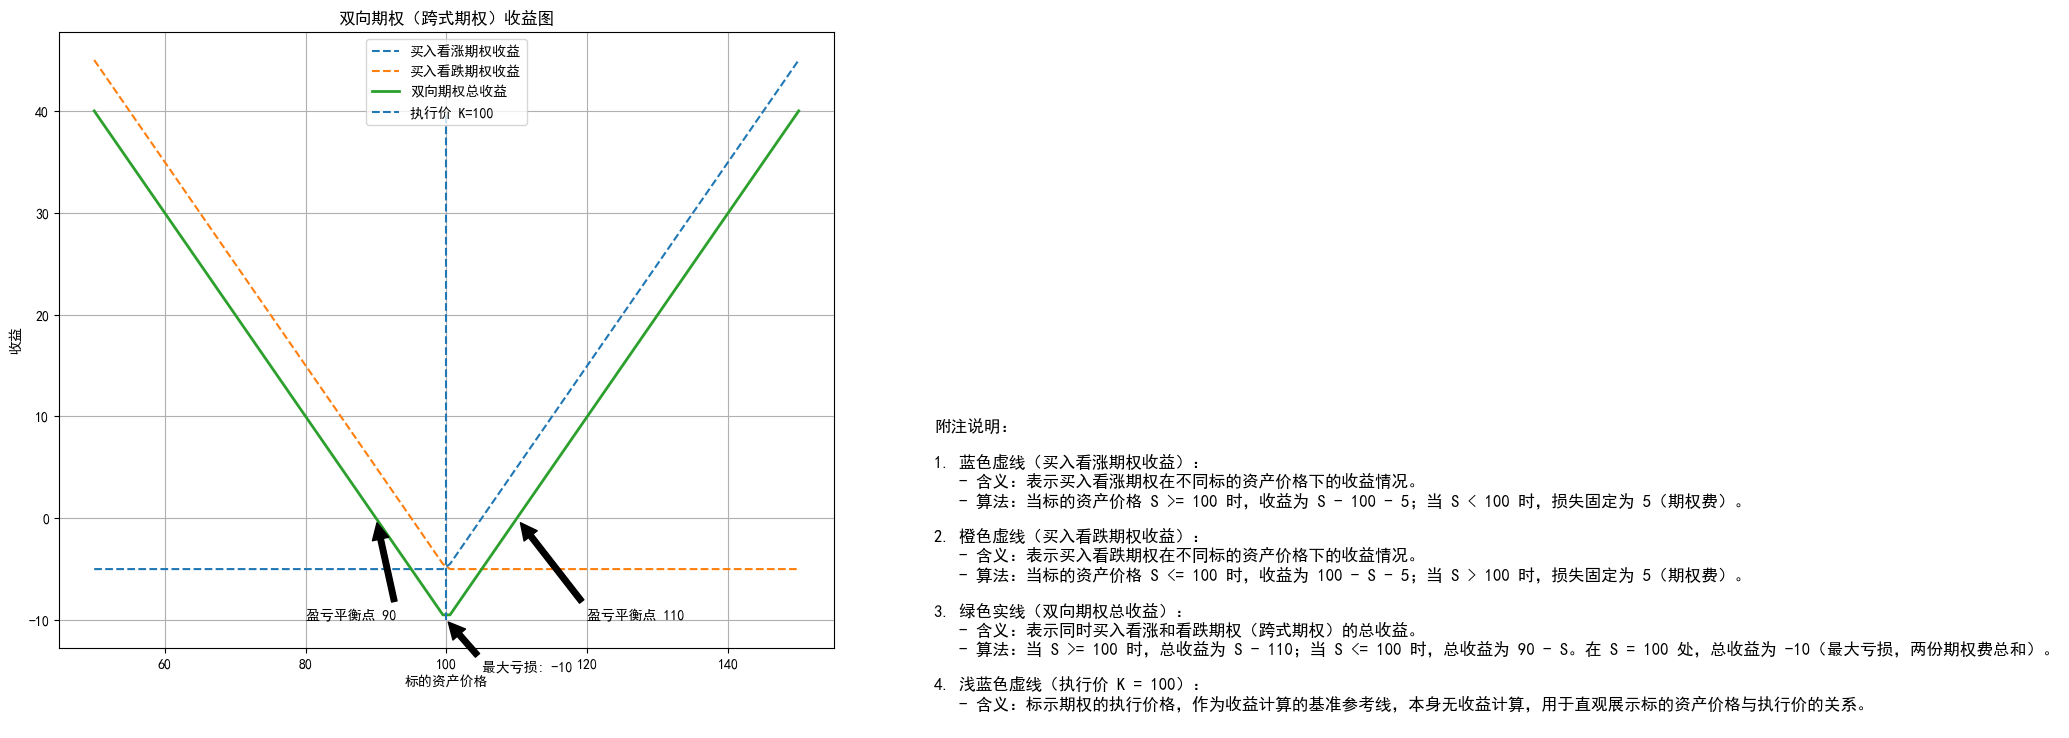

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei'] #设置能显示中文
plt.rcParams['axes.unicode_minus'] = False #设置负号


# 设置参数
strike_price = 100  # 执行价
call_premium = 5    # 看涨期权费
put_premium = 5     # 看跌期权费
total_premium = call_premium + put_premium  # 总期权费

# 生成标的资产价格范围
stock_prices = np.linspace(50, 150, 100)

# 计算买入看涨期权、看跌期权及双向期权的收益
call_payoff = np.maximum(stock_prices - strike_price, 0) - call_premium
put_payoff = np.maximum(strike_price - stock_prices, 0) - put_premium
straddle_payoff = call_payoff + put_payoff

# 计算盈亏平衡点
breakeven_low = strike_price - total_premium
breakeven_high = strike_price + total_premium

# 绘制图形
plt.figure(figsize=(10, 8))

# 绘制买入看涨期权收益
plt.plot(stock_prices, call_payoff, linestyle='--', label='买入看涨期权收益')
# 绘制买入看跌期权收益
plt.plot(stock_prices, put_payoff, linestyle='--', label='买入看跌期权收益')
# 绘制双向期权总收益
plt.plot(stock_prices, straddle_payoff, linewidth=2, label='双向期权总收益')

# 标注执行价
plt.vlines(strike_price, -total_premium, np.max(straddle_payoff),
           linestyles='dashed', label='执行价 K=100')
# 标注盈亏平衡点
plt.annotate(f'盈亏平衡点 {breakeven_low}', xy=(breakeven_low, 0),
             xytext=(breakeven_low - 10, -10),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(f'盈亏平衡点 {breakeven_high}', xy=(breakeven_high, 0),
             xytext=(breakeven_high + 10, -10),
             arrowprops=dict(facecolor='black', shrink=0.05))

# 标注最大亏损点
plt.annotate(f'最大亏损: -{total_premium}', xy=(strike_price, -total_premium),
             xytext=(strike_price + 5, -total_premium - 5),
             arrowprops=dict(facecolor='black', shrink=0.05))

# 添加标签和标题
plt.xlabel('标的资产价格')
plt.ylabel('收益')
plt.title('双向期权（跨式期权）收益图')
plt.legend()
plt.grid(True)

# 添加附注，加大间隔
notes = """
附注说明：

1. 蓝色虚线（买入看涨期权收益）：
   - 含义：表示买入看涨期权在不同标的资产价格下的收益情况。
   - 算法：当标的资产价格 S >= 100 时，收益为 S - 100 - 5；当 S < 100 时，损失固定为 5（期权费）。

2. 橙色虚线（买入看跌期权收益）：
   - 含义：表示买入看跌期权在不同标的资产价格下的收益情况。
   - 算法：当标的资产价格 S <= 100 时，收益为 100 - S - 5；当 S > 100 时，损失固定为 5（期权费）。

3. 绿色实线（双向期权总收益）：
   - 含义：表示同时买入看涨和看跌期权（跨式期权）的总收益。
   - 算法：当 S >= 100 时，总收益为 S - 110；当 S <= 100 时，总收益为 90 - S。在 S = 100 处，总收益为 -10（最大亏损，两份期权费总和）。

4. 浅蓝色虚线（执行价 K = 100）：
   - 含义：标示期权的执行价格，作为收益计算的基准参考线，本身无收益计算，用于直观展示标的资产价格与执行价的关系。
"""
# 调整附注位置，下移20个单位（通过降低y坐标实现）
plt.figtext(1, 0.01, notes, ha='left', va='bottom', fontsize=12)

# 显示图形
plt.show()
    